# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the Titanic dataset available at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data).


### Step 1. Import the necessary libraries

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings

In [13]:
#Note_yuri fix_warnings se inicializa el generador de números aleatorios de NumPy, 
#se activa la ocultación de los avisos y se fija el estilo gráfico de seaborn

np.random.seed(18)
warnings.filterwarnings('ignore')
sns.set()

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv) 

### Step 3. Assign it to a variable titanic 

In [14]:
url ='train.csv'
df = pd.read_csv(url)

In [15]:
titanic = df

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Step 4. Set `PassengerId` as the index 

In [7]:
titanic = titanic.set_index('PassengerId', inplace=True)

### Step 5. Create a pie chart representing the proportion between male/female.

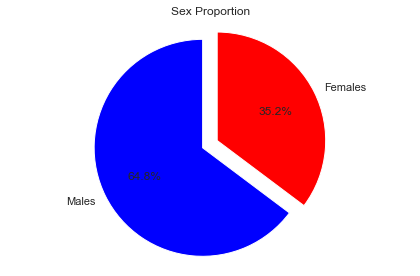

In [25]:
proportions = titanic.Sex.value_counts()
plt.pie(proportions, labels=['Males','Females'], shadow=False, colors=['blue', 'red'], explode=(0.15,0), startangle=90, autopct='%1.1f%%')
# view the plot drop above
plt.axis('equal')
# set labels
plt.title('Sex Proportion')
# View the plot
plt.tight_layout()
plt.show()

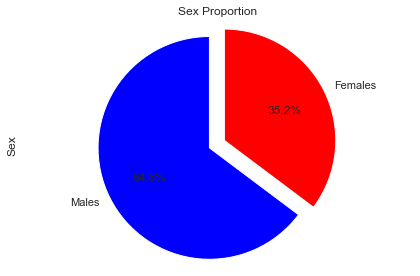

In [ ]:
titanic.Sex.value_counts().plot(kind='pie', labels=['Males','Females'], shadow=False, colors=['blue', 'red'], explode=(0.15,0), startangle=90, autopct='%1.1f%%')
# view the plot drop above
plt.axis('equal')
# set labels
plt.title('Sex Proportion')
# View the plot
plt.tight_layout()
plt.show()

In [ ]:
# Extra, check the type of Sex variable. 
# I want to recode the Sex variable: 1=male, 0=female
titanic.Sex.dtype

dtype('O')

In [ ]:
# Extra
def sex_to_numeric(x):
    if x == 'male':
        return 1
    if x == 'female':
        return 0

titanic['sex_encoded'] = titanic.Sex.apply(sex_to_numeric)
# to create a new column: sex_encoded, apply the function to the variable Sex.
# Note: for creating a new column users['sex_encoded'], without [] create a new df
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


### Step 6. Create a scatter plot of `Fare` and `Age`, differ the dot color by gender.

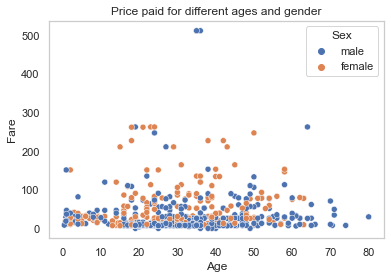

In [ ]:
# Set theme: White background
#sns.set_style('whitegrid')   # The default theme is called 'darkgrid' 
sns.set_style("whitegrid", {'axes.grid' : False})  # and remove the grid

scatterp = sns.scatterplot(x='Age', y='Fare', hue="Sex", data=titanic)
plt.title('Price paid for different ages and gender')
plt.show()

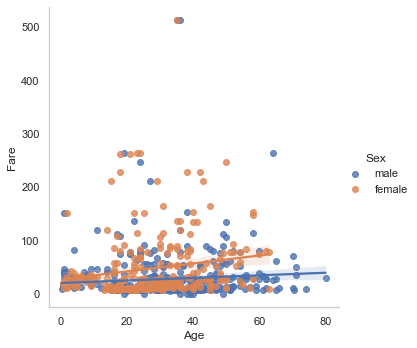

In [ ]:
# Extra
#Plot a simple linear relationship between two variables:
g = sns.lmplot(x="Age", y="Fare", hue="Sex", data=titanic)   

### Step 7. How many people survived?

In [ ]:
titanic.Survived.sum()

342

### Step 8. Create a histogram of `Fare` using `matplotlib`. Use bins of interval 10.

In [10]:
# create bins interval using numpy
binsInterval = np.arange(0,600,10)   # Interval 10
binsInterval

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590])

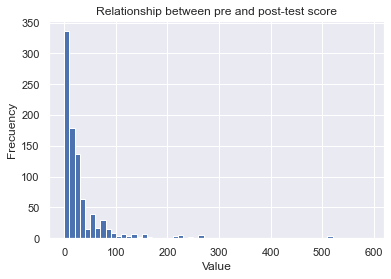

In [28]:
# Set style
#sns.set_style("whitegrid", {'axes.grid' : False})  # and remove the grid

binsInterval = np.arange(0,600,10)
plt.hist(titanic.Fare, bins = binsInterval)   # rwidth=0.9  # Using matplotlib

plt.xlabel("Value")
plt.ylabel("Frecuency")
plt.title("Relationship between pre and post-test score")

plt.show()


### Step 9. Create a histogram of `Fare` using `seaborn`. Use bins of interval 10.

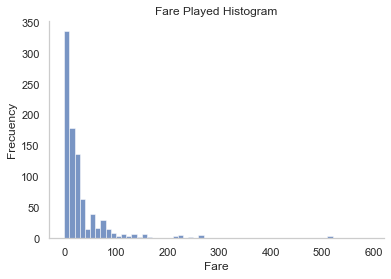

In [31]:
# Set theme: White background
#sns.set_style('whitegrid')   # The default theme is called 'darkgrid' 
sns.set_style("whitegrid", {'axes.grid' : False})  # and remove the grid

sns.histplot(titanic.Fare, bins=binsInterval, kde=False)   # alpha=.3   # kde=True: displays the Normal
plt.title("Fare Played Histogram")
plt.xlabel("Fare")
plt.ylabel("Frecuency")

# take out the right and upper borders 
sns.despine()

### BONUS: Create your own question and answer it.

#### Step bonus. Create three bar plots, one for class 1, other for class 2 and another for class 3, representing the the number of survivors (`Survived`). They must be side by side.

In [30]:
def survived_code(x):
    if x == 0:
        return 'No'
    if x == 1:
        return 'Yes'

titanic['Survived'] = titanic.Survived.apply(survived_code)

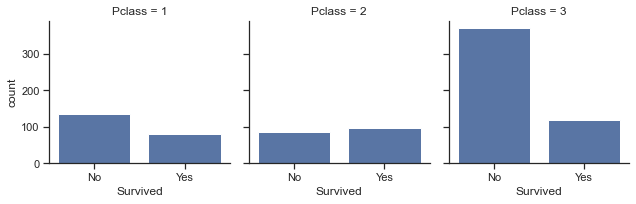

In [68]:
#seaborn style
sns.set(style='ticks')

g = sns.FacetGrid(titanic, col='Pclass')
g.map(sns.countplot, 'Survived')   
plt.show(g)